/var/folders/8_/cb_9t5l10lqd_sp5fm6w3fcw0000gn/T/ipykernel_47136/797688030.py:35: RuntimeWarning: divide by zero encountered in log
  d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * tau) / (sigma * np.sqrt(tau))


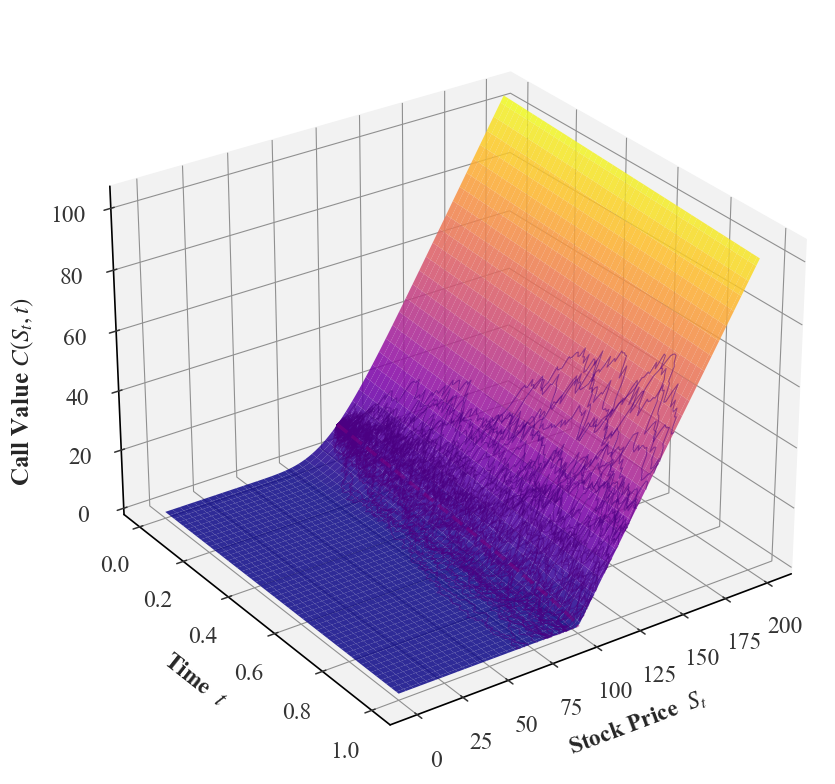

In [539]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.stats import norm

# --- 1. CONFIGURATION DU STYLE ---
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman"],
    "mathtext.fontset": "stix",
    "font.size": 12,
    "axes.labelsize": 16,
    "axes.labelweight": "bold",
    "axes.edgecolor": "black",
    "axes.linewidth": 1.2,
    "axes.facecolor": "white",
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "xtick.color": "#333333",
    "ytick.color": "#333333",
    "xtick.major.width": 1.1,
    "ytick.major.width": 1.1,
    "grid.color": "#909090",
    "grid.linestyle": "-", 
    "grid.linewidth": 0.8,
    "figure.facecolor": "white",
    "savefig.facecolor": "white"
})

# --- 2. DONNÉES MATHÉMATIQUES ---
K = 100; T = 1.0; r = 0.05; sigma = 0.2; S0 = 100

def black_scholes_call(S, t, K, T, r, sigma):
    tau = np.maximum(T - t, 1e-10)
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * tau) / (sigma * np.sqrt(tau))
    d2 = d1 - sigma * np.sqrt(tau)
    return S * norm.cdf(d1) - K * np.exp(-r * tau) * norm.cdf(d2)

# Surface
S_vals = np.linspace(0, 200, 100)
t_vals = np.linspace(0, 1, 100)
Sg, tg = np.meshgrid(S_vals, t_vals)
C_grid = black_scholes_call(Sg, tg, K, T, r, sigma)
C_grid[-1, :] = np.maximum(S_vals - K, 0)

# Monte Carlo
np.random.seed(42)
n_paths = 60
t_path = np.linspace(0, T, 200)
paths_S, paths_C = [], []
for _ in range(n_paths):
    S_path = [100]
    for i in range(len(t_path)-1):
        dt = t_path[i+1] - t_path[i]
        S_path.append(S_path[-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * np.random.normal()))
    paths_S.append(S_path)
    paths_C.append(black_scholes_call(np.array(S_path), t_path, K, T, r, sigma))

# --- 3. TRACÉ FINAL ---
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
ax.set_position([0.25, 0.1, 0.7, 0.8])

# Surface avec transparence à 0.8
ax.plot_surface(Sg, tg, C_grid, cmap="plasma", alpha=0.85, linewidth=0, antialiased=True)

# Chemins Monte Carlo
for i in range(n_paths):
    ax.plot(paths_S[i], t_path, paths_C[i], color='indigo', alpha=0.5, linewidth=0.8)

# --- AJOUT: LIGNE K=100 (Indigo, Pointillé Long) ---
t_K = np.linspace(0, T, 100)
S_K = np.full_like(t_K, K) # S est constant à 100
C_K = black_scholes_call(S_K, t_K, K, T, r, sigma)

ax.plot(S_K, t_K, C_K, 
        color='purple', 
        linestyle='--',
        alpha=0.5,  # Pointillé long (dashed)
        linewidth=2.5,   # Un peu plus épais pour bien la voir
        zorder=10)       # Force l'affichage au premier plan
# ---------------------------------------------------

# Labels
ax.set_xlabel(r"Stock Price  $S_t$", labelpad=19, fontsize=17)
ax.set_ylabel(r"Time  $t$", labelpad=19, fontsize=17)
ax.set_zlabel("") 

# TITRE VERTICAL MANUEL
ax.text2D(0.08, 0.5, r"Call Value $C(S_t,t)$", 
          transform=fig.transFigure,
          fontsize=18, 
          fontweight='bold',
          rotation=90, 
          va='center', 
          ha='center')

# Ticks
ax.tick_params(axis='z', labelsize=17, pad=10)
ax.tick_params(axis='x', labelsize=17, pad=10)
ax.tick_params(axis='y', labelsize=17, pad=10)

# Géométrie et Vue
ax.invert_yaxis()
ax.set_box_aspect((1.2, 1.2, 0.92))
ax.view_init(elev=28, azim=235)

# Panneaux
beige_gray = (0.949, 0.949, 0.949, 1.0)
ax.xaxis.set_pane_color(beige_gray)
ax.yaxis.set_pane_color(beige_gray)
ax.zaxis.set_pane_color(beige_gray)
ax.grid(True)

plt.subplots_adjust(left=0.0, right=1.0, top=1.0, bottom=0.0)
plt.tight_layout()
plt.savefig("/Users/robinguichon/Desktop/EI1:EI2/ProjetEI1/6.png", dpi=300, bbox_inches='tight')

plt.show()

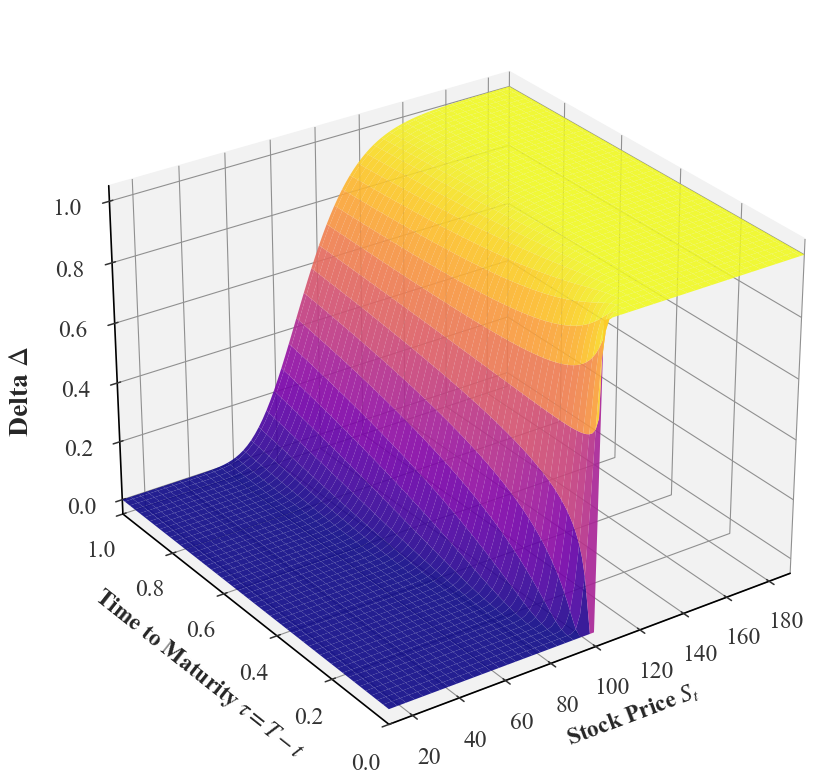

In [538]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.stats import norm

# --- 1. CONFIGURATION DU STYLE (Inchangée) ---
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman"],
    "mathtext.fontset": "stix",
    "font.size": 12,
    "axes.labelsize": 16,
    "axes.labelweight": "bold",
    "axes.edgecolor": "black",
    "axes.linewidth": 1.2,
    "axes.facecolor": "white",
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "xtick.color": "#333333",
    "ytick.color": "#333333",
    "xtick.major.width": 1.1,
    "ytick.major.width": 1.1,
    "grid.color": "#909090",
    "grid.linestyle": "-", 
    "grid.linewidth": 0.8,
    "figure.facecolor": "white",
    "savefig.facecolor": "white"
})

# --- 2. DONNÉES MATHÉMATIQUES (DELTA) ---
K = 100; r = 0.05; sigma = 0.2

def black_scholes_delta(S, tau, K, r, sigma):
    # tau est le Time to Maturity (T-t)
    # On évite la division par zéro avec un petit epsilon
    tau = np.maximum(tau, 1e-10)
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * tau) / (sigma * np.sqrt(tau))
    return norm.cdf(d1)

# Surface
# L'image montre S de 20 à 180 environ
S_vals = np.linspace(10, 190, 100) 
# L'image montre Time to Maturity de 0 à 1
tau_vals = np.linspace(0, 1, 100) 

Sg, taug = np.meshgrid(S_vals, tau_vals)
Delta_grid = black_scholes_delta(Sg, taug, K, r, sigma)

# Correction pour la maturité exacte (tau=0) -> Step function
# Si S < K, Delta = 0; Si S > K, Delta = 1
Delta_grid[0, S_vals < K] = 0.0
Delta_grid[0, S_vals >= K] = 1.0

# --- 3. TRACÉ FINAL ---
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
ax.set_position([0.25, 0.1, 0.7, 0.8])

# Surface
ax.plot_surface(Sg, taug, Delta_grid, cmap="plasma", alpha=0.9, linewidth=0, antialiased=True)

# Labels
# L'image utilise "Time to Maturity tau = T - t"
ax.set_xlabel(r"Stock Price $S_t$", labelpad=15, fontsize=17)
ax.set_ylabel(r"Time to Maturity $\tau = T - t$", labelpad=15, fontsize=17)
ax.set_zlabel("") 

# TITRE VERTICAL MANUEL (Delta)
ax.text2D(0.08, 0.5, r"Delta $\Delta$", 
          transform=fig.transFigure,
          fontsize=20, # Un peu plus gros
          fontweight='bold',
          rotation=90, 
          va='center', 
          ha='center')

# Ticks (Ajustés pour ressembler à l'image : 20, 40... 180)
ax.set_xticks(np.arange(20, 181, 20))
ax.set_yticks(np.arange(0, 1.1, 0.2))
ax.set_zticks(np.arange(0, 1.1, 0.2))

ax.tick_params(axis='z', labelsize=17, pad=10)
ax.tick_params(axis='x', labelsize=17, pad=8)
ax.tick_params(axis='y', labelsize=17, pad=8)

# Limites
ax.set_xlim(10, 190)
ax.set_ylim(0, 1)
ax.set_zlim(-0.05, 1.05) # Légère marge pour voir le 0 et le 1

# Géométrie et Vue
# Invert Y pour avoir 0 devant (Maturité) et 1 au fond
ax.set_box_aspect((1.2, 1.2, 0.92))
ax.view_init(elev=28, azim=235)

# Panneaux
beige_gray = (0.949, 0.949, 0.949, 1.0)
ax.xaxis.set_pane_color(beige_gray)
ax.yaxis.set_pane_color(beige_gray)
ax.zaxis.set_pane_color(beige_gray)
ax.grid(True)

plt.subplots_adjust(left=0.0, right=1.0, top=1.0, bottom=0.0)
plt.tight_layout()
plt.savefig("/Users/robinguichon/Desktop/EI1:EI2/ProjetEI1/5.png", dpi=300, bbox_inches='tight')

plt.show()

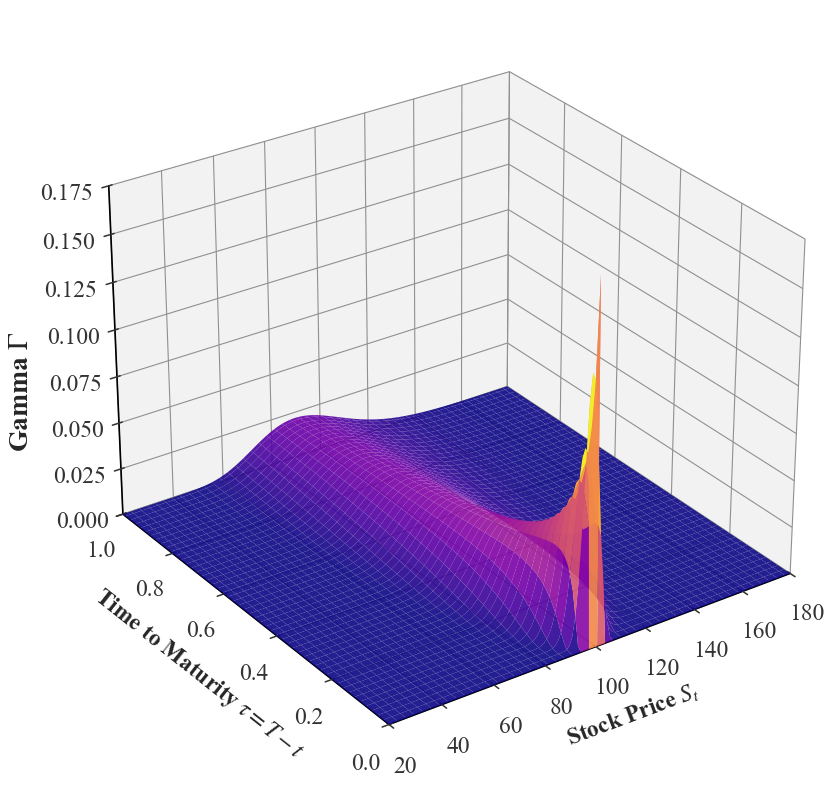

In [537]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.stats import norm

# --- 1. CONFIGURATION DU STYLE (Inchangée) ---
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman"],
    "mathtext.fontset": "stix",
    "font.size": 12,
    "axes.labelsize": 16,
    "axes.labelweight": "bold",
    "axes.edgecolor": "black",
    "axes.linewidth": 1.2,
    "axes.facecolor": "white",
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "xtick.color": "#333333",
    "ytick.color": "#333333",
    "xtick.major.width": 1.1,
    "ytick.major.width": 1.1,
    "grid.color": "#909090",
    "grid.linestyle": "-", 
    "grid.linewidth": 0.8,
    "figure.facecolor": "white",
    "savefig.facecolor": "white"
})

# --- 2. DONNÉES MATHÉMATIQUES (GAMMA) ---
K = 100; r = 0.05; sigma = 0.2

def black_scholes_gamma(S, tau, K, r, sigma):
    # tau est le Time to Maturity (T-t)
    tau = np.maximum(tau, 1e-10) # Évite la division par zéro
    
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * tau) / (sigma * np.sqrt(tau))
    
    # Formule du Gamma : N'(d1) / (S * sigma * sqrt(tau))
    # norm.pdf est la densité de probabilité (N')
    gamma = norm.pdf(d1) / (S * sigma * np.sqrt(tau))
    return gamma

# Surface
# S de 20 à 180 comme sur l'image
S_vals = np.linspace(20, 180, 150) # Plus de points pour lisser le pic
tau_vals = np.linspace(0, 1, 100) 

Sg, taug = np.meshgrid(S_vals, tau_vals)
Gamma_grid = black_scholes_gamma(Sg, taug, K, r, sigma)

# Correction pour l'affichage à maturité (tau=0)
# Théoriquement infini à la monnaie, 0 ailleurs.
# On laisse la grille telle quelle, le zlim coupera le pic infini proprement.

# --- 3. TRACÉ FINAL ---
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
ax.set_position([0.25, 0.1, 0.7, 0.8])

# Surface
ax.plot_surface(Sg, taug, Gamma_grid, cmap="plasma", alpha=0.9, linewidth=0, antialiased=True)

# Labels
ax.set_xlabel(r"Stock Price $S_t$", labelpad=15, fontsize=17)
ax.set_ylabel(r"Time to Maturity $\tau = T - t$", labelpad=15, fontsize=17)
ax.set_zlabel("") 

# TITRE VERTICAL MANUEL (Gamma)
ax.text2D(0.08, 0.5, r"Gamma $\Gamma$", 
          transform=fig.transFigure,
          fontsize=20,
          fontweight='bold',
          rotation=90, 
          va='center', 
          ha='center')

# Ticks (Ajustés pour Gamma)
ax.set_xticks(np.arange(20, 181, 20))    # 20, 40... 180
ax.set_yticks(np.arange(0, 1.1, 0.2))    # 0.0, 0.2... 1.0
ax.set_zticks(np.arange(0, 0.176, 0.025)) # 0.000, 0.025... 0.175

ax.tick_params(axis='z', labelsize=17, pad=10)
ax.tick_params(axis='x', labelsize=17, pad=8)
ax.tick_params(axis='y', labelsize=17, pad=8)

# Limites
ax.set_xlim(20, 180)
ax.set_ylim(0, 1)
ax.set_zlim(0, 0.175) # Limite pour correspondre à l'image et couper le pic infini

# Géométrie et Vue
ax.set_box_aspect((1.2, 1.2, 0.92))
ax.view_init(elev=28, azim=235)

# Panneaux
beige_gray = (0.949, 0.949, 0.949, 1.0)
ax.xaxis.set_pane_color(beige_gray)
ax.yaxis.set_pane_color(beige_gray)
ax.zaxis.set_pane_color(beige_gray)
ax.grid(True)

plt.subplots_adjust(left=0.0, right=1.0, top=1.0, bottom=0.0)
plt.tight_layout()
plt.savefig("/Users/robinguichon/Desktop/EI1:EI2/ProjetEI1/4.png", dpi=300, bbox_inches='tight')

plt.show()

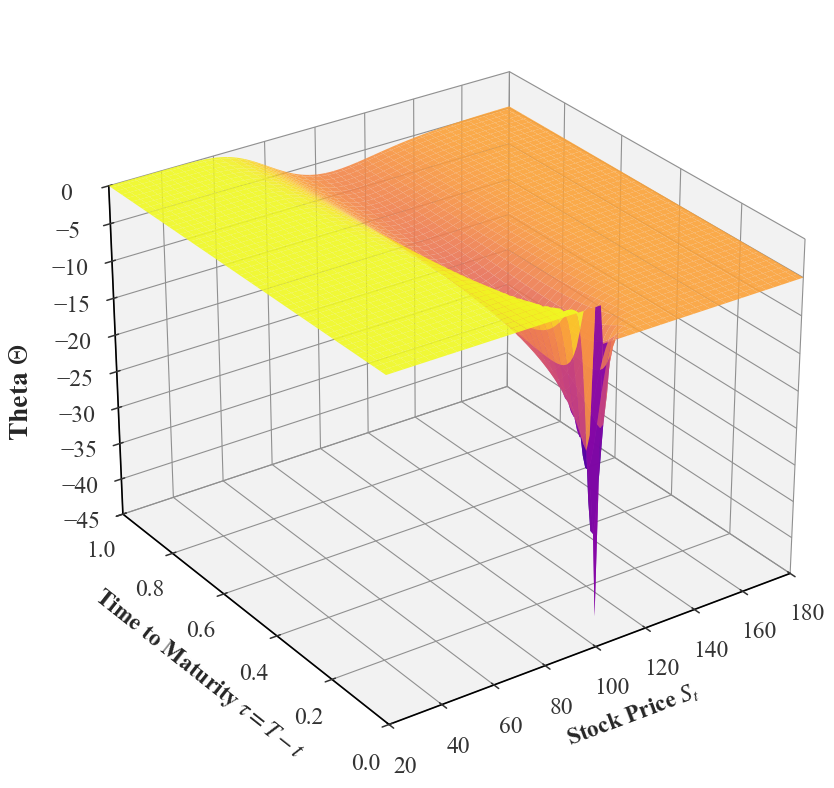

In [536]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.stats import norm

# --- 1. CONFIGURATION DU STYLE (Inchangée) ---
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman"],
    "mathtext.fontset": "stix",
    "font.size": 12,
    "axes.labelsize": 16,
    "axes.labelweight": "bold",
    "axes.edgecolor": "black",
    "axes.linewidth": 1.2,
    "axes.facecolor": "white",
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "xtick.color": "#333333",
    "ytick.color": "#333333",
    "xtick.major.width": 1.1,
    "ytick.major.width": 1.1,
    "grid.color": "#909090",
    "grid.linestyle": "-", 
    "grid.linewidth": 0.8,
    "figure.facecolor": "white",
    "savefig.facecolor": "white"
})

# --- 2. DONNÉES MATHÉMATIQUES (THETA) ---
K = 100; r = 0.05; sigma = 0.2

def black_scholes_theta(S, tau, K, r, sigma):
    # tau est le Time to Maturity (T-t)
    tau = np.maximum(tau, 1e-10) # Évite la division par zéro
    
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * tau) / (sigma * np.sqrt(tau))
    d2 = d1 - sigma * np.sqrt(tau)
    
    # Formule du Theta (Call)
    # Terme 1 : Décroissance due à la volatilité/spot
    term1 = -(S * sigma * norm.pdf(d1)) / (2 * np.sqrt(tau))
    # Terme 2 : Décroissance due au taux d'intérêt
    term2 = -r * K * np.exp(-r * tau) * norm.cdf(d2)
    
    theta = term1 + term2
    return theta

# Surface
S_vals = np.linspace(20, 180, 150)
tau_vals = np.linspace(0, 1, 100) 

Sg, taug = np.meshgrid(S_vals, tau_vals)
Theta_grid = black_scholes_theta(Sg, taug, K, r, sigma)

# --- 3. TRACÉ FINAL ---
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
ax.set_position([0.25, 0.1, 0.7, 0.8])

# Surface
# Le Theta est négatif : les valeurs proches de 0 seront jaunes (haut), les très négatives violettes (bas)
ax.plot_surface(Sg, taug, Theta_grid, cmap="plasma", alpha=0.9, linewidth=0, antialiased=True)

# Labels
ax.set_xlabel(r"Stock Price $S_t$", labelpad=15, fontsize=17)
ax.set_ylabel(r"Time to Maturity $\tau = T - t$", labelpad=15, fontsize=17)
ax.set_zlabel("") 

# TITRE VERTICAL MANUEL (Theta)
ax.text2D(0.08, 0.5, r"Theta $\Theta$", 
          transform=fig.transFigure,
          fontsize=20,
          fontweight='bold',
          rotation=90, 
          va='center', 
          ha='center')

# Ticks (Ajustés pour Theta selon l'image)
ax.set_xticks(np.arange(20, 181, 20))    # 20, 40... 180
ax.set_yticks(np.arange(0, 1.1, 0.2))    # 0.0, 0.2... 1.0
# Ticks Z négatifs de -35 à 0 par pas de 5
ax.set_zticks(np.arange(-45, 1, 5))      

ax.tick_params(axis='z', labelsize=17, pad=10)
ax.tick_params(axis='x', labelsize=17, pad=8)
ax.tick_params(axis='y', labelsize=17, pad=8)

# Limites
ax.set_xlim(20, 180)
ax.set_ylim(0, 1)
# On coupe à -35 pour éviter le pic infini négatif à la monnaie
ax.set_zlim(-45, 0) 

# Géométrie et Vue
ax.set_box_aspect((1.2, 1.2, 0.92))
ax.view_init(elev=28, azim=235)

# Panneaux
beige_gray = (0.949, 0.949, 0.949, 1.0)
ax.xaxis.set_pane_color(beige_gray)
ax.yaxis.set_pane_color(beige_gray)
ax.zaxis.set_pane_color(beige_gray)
ax.grid(True)

plt.subplots_adjust(left=0.0, right=1.0, top=1.0, bottom=0.0)
plt.tight_layout()
plt.savefig("/Users/robinguichon/Desktop/EI1:EI2/ProjetEI1/3.png", dpi=300, bbox_inches='tight')

plt.show()

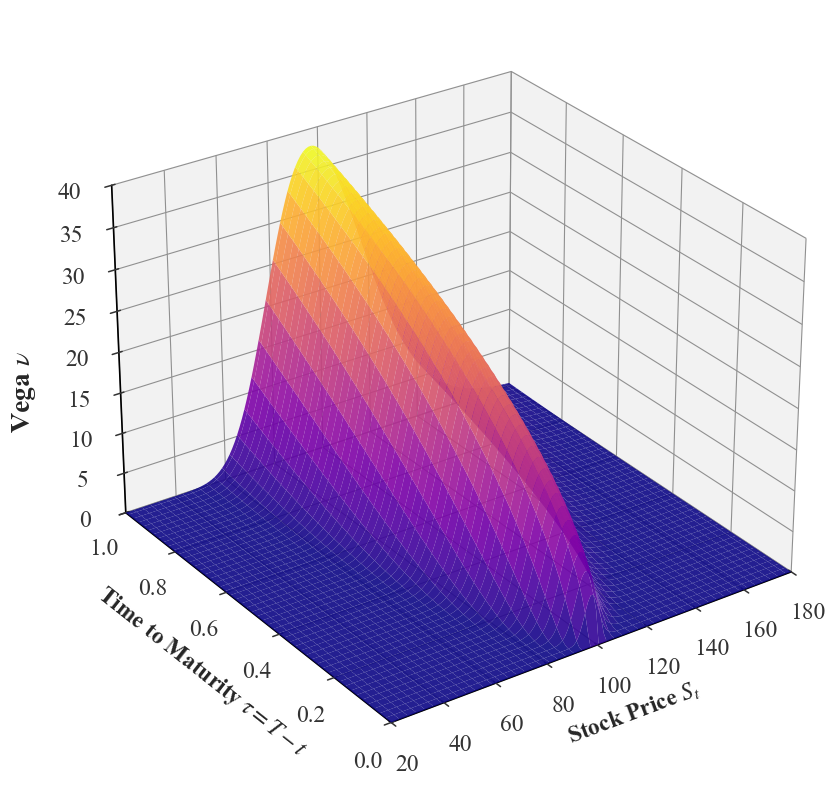

In [535]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.stats import norm

# --- 1. CONFIGURATION DU STYLE (Inchangée) ---
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman"],
    "mathtext.fontset": "stix",
    "font.size": 12,
    "axes.labelsize": 16,
    "axes.labelweight": "bold",
    "axes.edgecolor": "black",
    "axes.linewidth": 1.2,
    "axes.facecolor": "white",
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "xtick.color": "#333333",
    "ytick.color": "#333333",
    "xtick.major.width": 1.1,
    "ytick.major.width": 1.1,
    "grid.color": "#909090",
    "grid.linestyle": "-", 
    "grid.linewidth": 0.8,
    "figure.facecolor": "white",
    "savefig.facecolor": "white"
})

# --- 2. DONNÉES MATHÉMATIQUES (VEGA) ---
K = 100; r = 0.05; sigma = 0.2

def black_scholes_vega(S, tau, K, r, sigma):
    # tau est le Time to Maturity (T-t)
    tau = np.maximum(tau, 1e-10) # Évite la division par zéro
    
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * tau) / (sigma * np.sqrt(tau))
    
    # Formule du Vega : S * sqrt(tau) * N'(d1)
    vega = S * np.sqrt(tau) * norm.pdf(d1)
    return vega

# Surface
S_vals = np.linspace(20, 180, 150)
tau_vals = np.linspace(0, 1, 100) 

Sg, taug = np.meshgrid(S_vals, tau_vals)
Vega_grid = black_scholes_vega(Sg, taug, K, r, sigma)

# --- 3. TRACÉ FINAL ---
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
ax.set_position([0.25, 0.1, 0.7, 0.8])

# Surface
ax.plot_surface(Sg, taug, Vega_grid, cmap="plasma", alpha=0.9, linewidth=0, antialiased=True)

# Labels
ax.set_xlabel(r"Stock Price $S_t$", labelpad=15, fontsize=17)
ax.set_ylabel(r"Time to Maturity $\tau = T - t$", labelpad=15, fontsize=17)
ax.set_zlabel("") 

# TITRE VERTICAL MANUEL (Vega)
ax.text2D(0.08, 0.5, r"Vega $\nu$", 
          transform=fig.transFigure,
          fontsize=20,
          fontweight='bold',
          rotation=90, 
          va='center', 
          ha='center')

# Ticks (Ajustés pour Vega selon l'image)
ax.set_xticks(np.arange(20, 181, 20))    # 20, 40... 180
ax.set_yticks(np.arange(0, 1.1, 0.2))    # 0.0, 0.2... 1.0
ax.set_zticks(np.arange(0, 41, 5))       # 0, 5, 10... 40

ax.tick_params(axis='z', labelsize=17, pad=10)
ax.tick_params(axis='x', labelsize=17, pad=8)
ax.tick_params(axis='y', labelsize=17, pad=8)

# Limites
ax.set_xlim(20, 180)
ax.set_ylim(0, 1)
ax.set_zlim(0, 40) 

# Géométrie et Vue
ax.set_box_aspect((1.2, 1.2, 0.92))
ax.view_init(elev=28, azim=235)

# Panneaux
beige_gray = (0.949, 0.949, 0.949, 1.0)
ax.xaxis.set_pane_color(beige_gray)
ax.yaxis.set_pane_color(beige_gray)
ax.zaxis.set_pane_color(beige_gray)
ax.grid(True)

plt.subplots_adjust(left=0.0, right=1.0, top=1.0, bottom=0.0)

plt.savefig("/Users/robinguichon/Desktop/EI1:EI2/ProjetEI1/2.png", dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

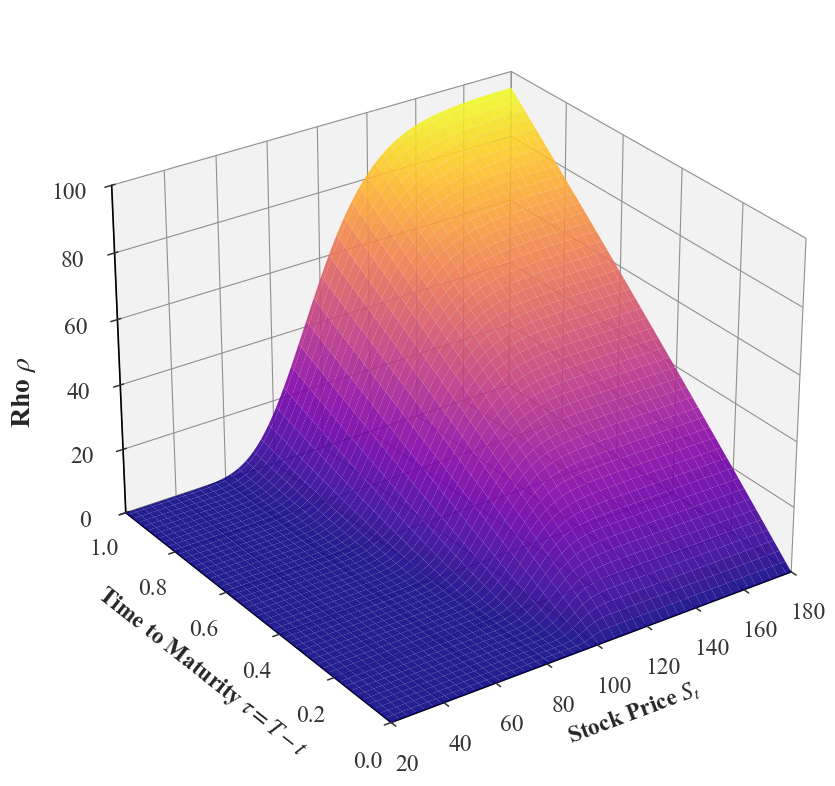

In [534]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.stats import norm

# --- 1. CONFIGURATION DU STYLE (Inchangée) ---
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman"],
    "mathtext.fontset": "stix",
    "font.size": 12,
    "axes.labelsize": 16,
    "axes.labelweight": "bold",
    "axes.edgecolor": "black",
    "axes.linewidth": 1.2,
    "axes.facecolor": "white",
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "xtick.color": "#333333",
    "ytick.color": "#333333",
    "xtick.major.width": 1.1,
    "ytick.major.width": 1.1,
    "grid.color": "#909090",
    "grid.linestyle": "-", 
    "grid.linewidth": 0.8,
    "figure.facecolor": "white",
    "savefig.facecolor": "white"
})

# --- 2. DONNÉES MATHÉMATIQUES (RHO) ---
K = 100; r = 0.05; sigma = 0.2

def black_scholes_rho(S, tau, K, r, sigma):
    # tau est le Time to Maturity (T-t)
    tau = np.maximum(tau, 1e-10) # Évite la division par zéro
    
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * tau) / (sigma * np.sqrt(tau))
    d2 = d1 - sigma * np.sqrt(tau)
    
    # Formule du Rho : K * tau * exp(-r*tau) * N(d2)
    rho = K * tau * np.exp(-r * tau) * norm.cdf(d2)
    return rho

# Surface
S_vals = np.linspace(20, 180, 150)
tau_vals = np.linspace(0, 1, 100) 

Sg, taug = np.meshgrid(S_vals, tau_vals)
Rho_grid = black_scholes_rho(Sg, taug, K, r, sigma)

# --- 3. TRACÉ FINAL ---
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
ax.set_position([0.25, 0.1, 0.7, 0.8])

# Surface
ax.plot_surface(Sg, taug, Rho_grid, cmap="plasma", alpha=0.9, linewidth=0, antialiased=True)

# Labels
ax.set_xlabel(r"Stock Price $S_t$", labelpad=15, fontsize=17)
ax.set_ylabel(r"Time to Maturity $\tau = T - t$", labelpad=15, fontsize=17)
ax.set_zlabel("") 

# TITRE VERTICAL MANUEL (Rho)
ax.text2D(0.08, 0.5, r"Rho $\rho$", 
          transform=fig.transFigure,
          fontsize=20,
          fontweight='bold',
          rotation=90, 
          va='center', 
          ha='center')

# Ticks (Ajustés pour Rho selon l'image)
ax.set_xticks(np.arange(20, 181, 20))    # 20, 40... 180
ax.set_yticks(np.arange(0, 1.1, 0.2))    # 0.0, 0.2... 1.0
ax.set_zticks(np.arange(0, 101, 20))      # 0, 20, 40, 60, 80

ax.tick_params(axis='z', labelsize=17, pad=10)
ax.tick_params(axis='x', labelsize=17, pad=8)
ax.tick_params(axis='y', labelsize=17, pad=8)

# Limites
ax.set_xlim(20, 180)
ax.set_ylim(0, 1)
ax.set_zlim(0, 100) # Ajusté pour laisser de la marge au-dessus du pic (~80)

# Géométrie et Vue
ax.set_box_aspect((1.2, 1.2, 0.92))
ax.view_init(elev=28, azim=235)

# Panneaux
beige_gray = (0.949, 0.949, 0.949, 1.0)
ax.xaxis.set_pane_color(beige_gray)
ax.yaxis.set_pane_color(beige_gray)
ax.zaxis.set_pane_color(beige_gray)
ax.grid(True)

plt.subplots_adjust(left=0.0, right=1.0, top=1.0, bottom=0.0)

plt.savefig("/Users/robinguichon/Desktop/EI1:EI2/ProjetEI1/1.png", dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

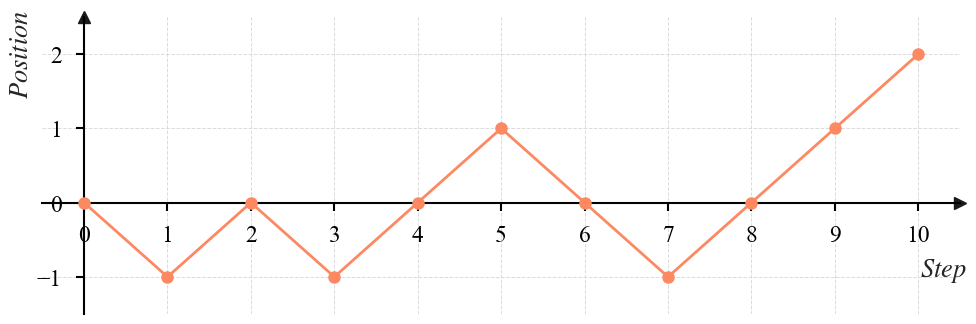

In [533]:
import matplotlib.pyplot as plt
import numpy as np

# --- CONFIGURATION DU STYLE (Times New Roman) ---
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman"], 
    "mathtext.fontset": "stix",        
    "font.size": 14,
    "axes.linewidth": 1.5,
})

# --- DONNÉES ---
x = np.arange(0, 11)
y = np.array([0, -1, 0, -1, 0, 1, 0, -1, 0, 1, 2])

# --- CRÉATION DE LA FIGURE ---
fig, ax = plt.subplots(figsize=(10, 3.5))

# 1. Tracé (Couleur Saumon comme sur la photo)
ax.plot(x, y, color='#fc8961', marker='o', markersize=8, linewidth=2, zorder=3)

# 2. Grille
ax.grid(True, which='both', linestyle='--', linewidth=0.7, color='lightgray', alpha=0.8, zorder=0)

# 3. Axes centrés avec Flèches
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')

# Flèches aux bouts
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False, markersize=8)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False, markersize=8)

# 4. Ticks (CORRECTION ICI)
ax.set_xticks(np.arange(0, 11, 1))
ax.set_yticks(np.arange(-1, 3, 1))

# On force l'affichage des ticks (bottom=True, left=True) et on les dirige vers l'extérieur
ax.tick_params(axis='both', 
               direction='out',   # Les traits sortent des axes
               length=6,          # Longueur du trait
               width=1.5,         # Epaisseur
               colors='black', 
               bottom=True,       # <--- FORCE L'AFFICHAGE EN BAS
               left=True,         # <--- FORCE L'AFFICHAGE A GAUCHE
               pad=10, 
               labelsize=17)

# 5. Limites
ax.set_xlim(-0.5, 10.5)
ax.set_ylim(-1.5, 2.5)

# 6. Titres des axes
# "position" -> Vertical
ax.text(-0.6, 2, r'$Position$', 
        fontsize=19, 
        fontweight='bold', 
        rotation=90,       
        va='center', 
        ha='right')

# "step" -> Horizontal
ax.text(10.3, -1, r'$Step$', fontsize=19, fontweight='bold', ha='center')
plt.savefig("/Users/robinguichon/Desktop/EI1:EI2/ProjetEI1/chhccccccccdsss.png", dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

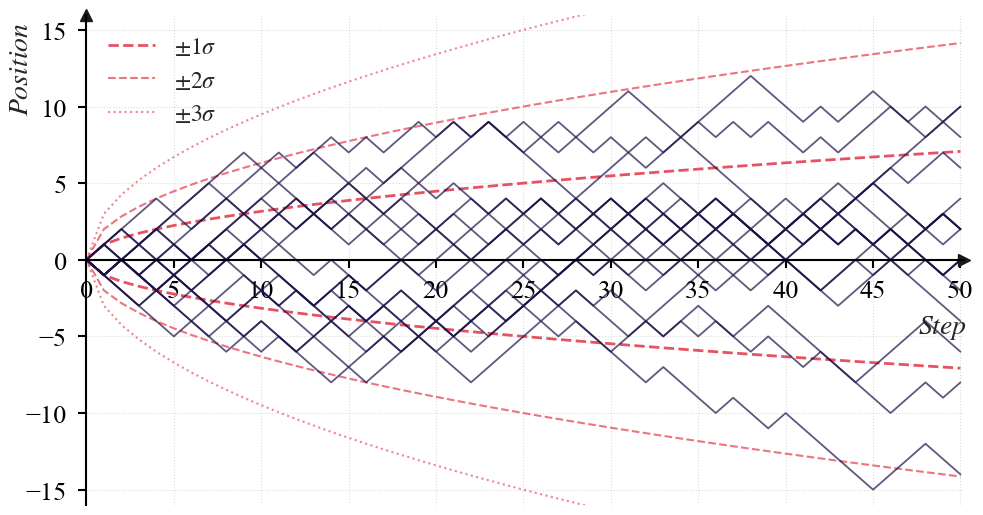

In [532]:
import matplotlib.pyplot as plt
import numpy as np

# --- CONFIGURATION DU STYLE ---
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman"],
    "mathtext.fontset": "stix",
    "font.size": 14,
    "axes.linewidth": 1.5,
})

# --- GÉNÉRATION DES DONNÉES ---
np.random.seed(42)
n_steps = 50
n_walks = 18

# Création des marches aléatoires
steps = np.random.choice([-1, 1], size=(n_walks, n_steps))
paths = np.cumsum(steps, axis=1)
paths = np.hstack((np.zeros((n_walks, 1)), paths))
x = np.arange(n_steps + 1)

# Calcul des sigmas
sigma = np.sqrt(x)

# --- CRÉATION DE LA FIGURE ---
fig, ax = plt.subplots(figsize=(10, 5.4))

# 1. Tracé des enveloppes
color_sigma = '#e75263' # Rouge saturé
ax.plot(x, sigma, color=color_sigma, linestyle='--', linewidth=2, label=r'$\pm 1\sigma$')
ax.plot(x, -sigma, color=color_sigma, linestyle='--', linewidth=2)
ax.plot(x, 2*sigma, color=color_sigma, linestyle='--', linewidth=1.5, alpha=0.8, label=r'$\pm 2\sigma$')
ax.plot(x, -2*sigma, color=color_sigma, linestyle='--', linewidth=1.5, alpha=0.8)
ax.plot(x, 3*sigma, color=color_sigma, linestyle=':', linewidth=1.5, alpha=0.7, label=r'$\pm 3\sigma$')
ax.plot(x, -3*sigma, color=color_sigma, linestyle=':', linewidth=1.5, alpha=0.7)

# 2. Tracé des Marches Aléatoires
for i in range(n_walks):
    ax.plot(x, paths[i], color='#1d1147', linewidth=1.3, alpha=0.7, zorder=2)


col_orange = '#fc8961' 
col_teal = '#b73779'
# 3. Grille
ax.grid(True, which='both', linestyle=':', linewidth=0.8, color='lightgray', alpha=0.8, zorder=0)

# 4. Axes centrés
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')

# Flèches
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False, markersize=8)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False, markersize=8)

# 5. Ticks et Limites
ax.set_xticks(np.arange(0, 50.1, 5))
ax.set_yticks(np.arange(-15, 16, 5))
ax.set_xlim(0, 50.2)
ax.set_ylim(-16, 16)

# --- CORRECTION ICI : TAILLE 17 ---
ax.tick_params(axis='both', 
               which='major', 
               direction='out',
               length=6, 
               width=1.5, 
               colors='black', 
               top=False, right=False, 
               bottom=True, left=True,
               pad=8,
               labelsize=19) # <--- AJOUT DE LA TAILLE ICI

# 6. Titres
ax.text(-3, 12.5, r'$Position$', fontsize=20, fontweight='bold', rotation=90, va='center', ha='right')
ax.text(49, -3.5, r'$Step$', fontsize=20, fontweight='bold', ha='center', va='top')

# Légende
ax.legend(loc='upper left', frameon=False, fontsize=17)
plt.savefig("/Users/robinguichon/Desktop/EI1:EI2/ProjetEI1/ccccccdsss.png", dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

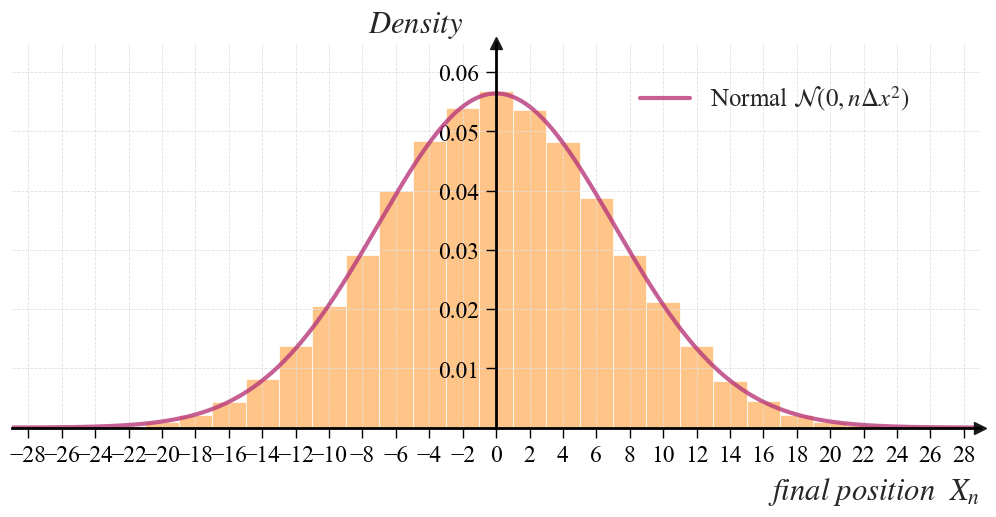

In [531]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# --- CONFIGURATION DU STYLE ---
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman"],
    "mathtext.fontset": "stix",
    "font.size": 14,
    # --- MODIFICATION 1 : Ligne de l'axe plus grosse ---
    "axes.linewidth": 2.0, # (était à 1.5)
})

# --- GÉNÉRATION DES DONNÉES ---
np.random.seed(42)
n_walks = 100000 
n_steps = 50      

final_positions = np.sum(np.random.choice([-1, 1], size=(n_walks, n_steps)), axis=1)

mu = 0
sigma = np.sqrt(n_steps)
x_theory = np.linspace(-30, 30, 500)
y_theory = stats.norm.pdf(x_theory, mu, sigma)

# --- CRÉATION DE LA FIGURE ---
fig, ax = plt.subplots(figsize=(12.5, 5))

# --- COULEURS ---
color_blue_hist = '#fec488' 
color_red_custom = '#b73779'



['#000004', '#1d1147', '#51127c', '#832681', '#b73779', '#e75263', '#fc8961', '#fec488', '#fcfdbf']
# 1. Histogramme
bins = np.arange(-31, 32, 2) 
ax.hist(final_positions, bins=bins, density=True, 
        color=color_blue_hist, edgecolor='white', linewidth=0.5, alpha=1.0, zorder=2)

# 2. Courbe Normale
ax.plot(x_theory, y_theory, color=color_red_custom, linewidth=3, alpha=0.8, 
        label=r'Normal $\mathcal{N}(0, n\Delta x^2)$', zorder=3)

# 3. Grille
ax.grid(True, which='both', linestyle='--', linewidth=0.6, color='#e0e0e0', zorder=0)

# 4. Configuration des Axes (Centrés)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

ax.spines['left'].set_zorder(10)
ax.spines['bottom'].set_zorder(10)

# Flèches aux extrémités
# --- MODIFICATION 3 : Flèches plus grosses (markersize 12) ---
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False, markersize=8, zorder=10)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False, markersize=8, zorder=10)

# 5. Ticks et Limites
ax.set_xlim(-29, 29)
ax.set_ylim(0, 0.065)

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

xticks = np.arange(-28, 29, 2)
ax.set_xticks(xticks)

yticks = np.arange(0, 0.061, 0.01)
ax.set_yticks(yticks)
yticklabels = [f"{y:.2f}" if y > 0.001 else "" for y in yticks]
ax.set_yticklabels(yticklabels)

ax.set_axisbelow(False) 

# --- MODIFICATION 2 : Ticks plus gros (width=3.0) ---
ax.tick_params(axis='both', 
               which='major', 
               direction='out',
               length=7,       # J'ai aussi rallongé un peu les traits (5 -> 7)
               width=1.0,      # <--- Epaisseur du trait de graduation (était 1)
               colors='black', 
               left=True,         
               bottom=True,       
               pad=5,
               labelsize=17,
               zorder=10)

# 6. Labels et Titres
ax.text(-2, 0.068, r'$Density$', fontsize=22, fontweight='bold', ha='right', va='center')
ax.text(29, -0.008, r'$final \ position \ \ X_n$', fontsize=22, fontweight='bold', ha='right', va='top')

# Légende
ax.legend(loc='upper right', frameon=False, fontsize=18, bbox_to_anchor=(0.95, 0.95))

plt.savefig("/Users/robinguichon/Desktop/EI1:EI2/ProjetEI1/cccccccccdsss.png", dpi=300, bbox_inches='tight')
plt.show()

/var/folders/8_/cb_9t5l10lqd_sp5fm6w3fcw0000gn/T/ipykernel_47136/239930442.py:137: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


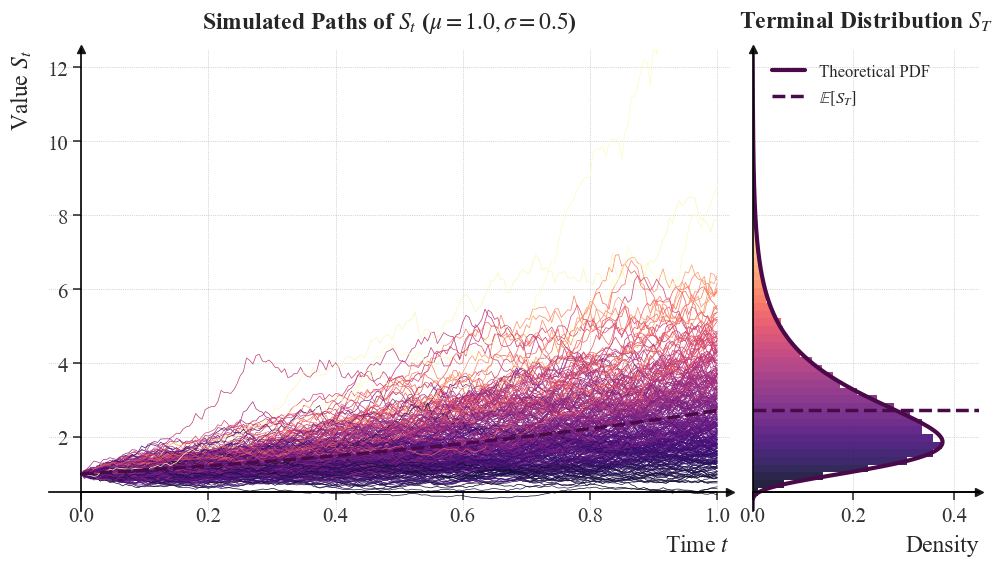

In [530]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from matplotlib import cm
import matplotlib.gridspec as gridspec

# --- 1. CONFIGURATION DU STYLE ---
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman"],
    "mathtext.fontset": "stix",
    "font.size": 12,
    "axes.linewidth": 1.2,
    "axes.labelsize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "figure.facecolor": "white",
    "savefig.facecolor": "white"
})

# --- 2. PARAMÈTRES ET SIMULATION ---
np.random.seed(42) 
mu = 1.0       
sigma = 0.5  
S0 = 1.0       
T = 1.0        
dt = 0.005     
N = int(T / dt)
t = np.linspace(0, T, N + 1)

n_paths_plot = 300   
n_sims_hist = 10000  

# Simulation
dB = np.random.randn(n_paths_plot, N) * np.sqrt(dt)
B = np.cumsum(dB, axis=1)
B = np.hstack([np.zeros((n_paths_plot, 1)), B]) 
S_paths = S0 * np.exp((mu - 0.5 * sigma**2) * t + sigma * B)

Z = np.random.randn(n_sims_hist)
S_T = S0 * np.exp((mu - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)

E_St = S0 * np.exp(mu * t)
E_ST_val = E_St[-1]

y_grid = np.linspace(0.01, 14, 500)
scale_param = S0 * np.exp((mu - 0.5 * sigma**2) * T)
s_param = sigma * np.sqrt(T)
pdf_values = stats.lognorm.pdf(y_grid, s=s_param, scale=scale_param)

# --- 3. CRÉATION DE LA FIGURE ---
fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1], wspace=0.05)

ax1 = fig.add_subplot(gs[0]) 
ax2 = fig.add_subplot(gs[1], sharey=ax1) 

# Limites
ylim_max = 12.5
ax1.set_ylim(0.001, ylim_max)
ax1.set_xlim(-0.05, 1.02)
ax2.set_xlim(0, 0.45)

# --- PANNEAU GAUCHE ---
cmap = cm.magma 
norm = plt.Normalize(vmin=0, vmax=8)

for i in range(n_paths_plot):
    color = cmap(norm(S_paths[i, -1]))
    ax1.plot(t, S_paths[i], color=color, linewidth=0.5, alpha=1)

ax1.plot(t, E_St, color='#4a0a4a', linestyle='--', linewidth=2.50, label=r'$\mathbb{E}[S_t]$', zorder=5)
ax1.set_title(r"Simulated Paths of $S_t$ ($\mu=1.0, \sigma=0.5$)", fontsize=17, fontweight='bold', pad=15)
ax1.grid(True, linestyle=':', linewidth=0.5, alpha=0.7)

# --- TICKS AXE GAUCHE ---
ax1.tick_params(axis='both', 
                labelsize=15, 
                direction='out', 
                length=6,       
                width=1.2,      
                bottom=True,    
                left=True)      

# --- PANNEAU DROITE ---
n, bins, patches = ax2.hist(S_T, bins=60, density=True, orientation='horizontal', 
                            range=(0, ylim_max), edgecolor='none', alpha=0.9)

for val, patch in zip(bins, patches):
    color = cmap(norm(val))
    plt.setp(patch, 'facecolor', color)

ax2.plot(pdf_values, y_grid, color='#4a0a4a', linewidth=3, label='Theoretical PDF')
ax2.hlines(E_ST_val, 0, 0.45, colors='#4a0a4a', linestyles='--', linewidth=2.5, label=r'$\mathbb{E}[S_T]$')
ax2.set_title(r"Terminal Distribution $S_T$", fontsize=17, fontweight='bold', pad=15)
ax2.grid(True, linestyle=':', linewidth=0.5, alpha=0.7)

# Axe droite : Pas de Y ticks, mais X ticks présents
ax2.tick_params(axis='y', left=False, labelleft=False) 
ax2.tick_params(axis='x', labelsize=15, direction='out', length=6, width=1.2, bottom=True)

# --- MODIFICATION ICI : Légende déplacée à gauche ---
ax2.legend(loc='upper left', bbox_to_anchor=(0.02, 1.0), frameon=False, fontsize=12)

# --- 4. AXES ET FLÈCHES ---

# GAUCHE
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_position(('data', 0))
ax1.spines['bottom'].set_position(('data', 0.5))

ax1.plot(0, 1, "^k", transform=ax1.get_xaxis_transform(), clip_on=False, markersize=6)
ax1.plot(1, 0.5, ">k", transform=ax1.get_yaxis_transform(), clip_on=False, markersize=6)

ax1.hlines(0.5, 0, 1, colors='black', linewidth=1.2)

# Titres
ax1.text(-0.04, 1.0, r"Value $S_t$", transform=ax1.transAxes, fontsize=17, 
         rotation=90, va='top', ha='center')
ax1.text(1.0, -0.05, r"Time $t$", transform=ax1.transAxes, fontsize=17, ha='right', va='top')

# DROITE
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_position(('data', 0))
ax2.spines['bottom'].set_position(('data', 0.5))

ax2.plot(0, 1, "^k", transform=ax2.get_xaxis_transform(), clip_on=False, markersize=6)
ax2.plot(1, 0.5, ">k", transform=ax2.get_yaxis_transform(), clip_on=False, markersize=6)

ax2.hlines(0.5, 0, 0.45, colors='black', linewidth=1.2)

# Titre
ax2.text(1.0, -0.05, r"Density", transform=ax2.transAxes, fontsize=17, ha='right', va='top')

plt.tight_layout()
plt.savefig("/Users/robinguichon/Desktop/EI1:EI2/ProjetEI1/Brownian_Motion_Sim.png", dpi=300, bbox_inches='tight')
plt.show()

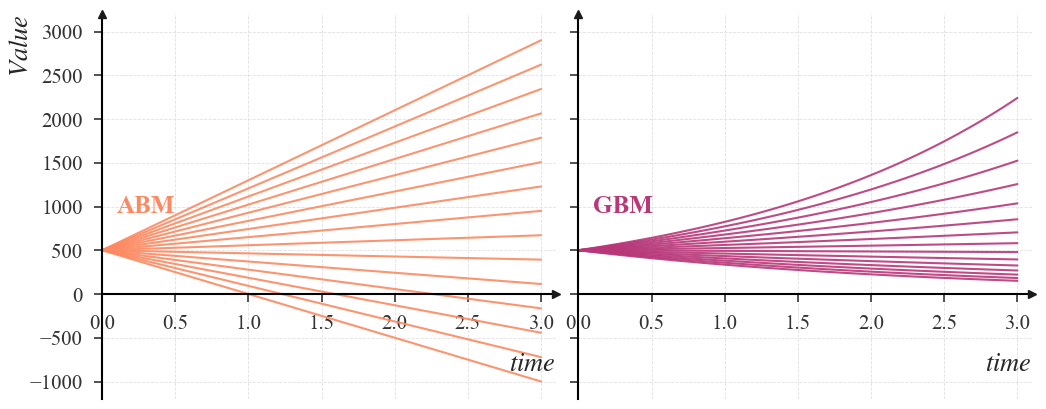

In [529]:
import matplotlib.pyplot as plt
import numpy as np

# --- 1. CONFIGURATION DU STYLE ---
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman"],
    "mathtext.fontset": "stix",
    "font.size": 12,
    "axes.linewidth": 1.5,
    "xtick.direction": "out",
    "ytick.direction": "out",
    "figure.facecolor": "white",
    "savefig.facecolor": "white"
})

# --- 2. DONNÉES ---
t = np.linspace(0, 3, 100)
S0 = 500 

slopes = np.linspace(-500, 800, 15) 
mus = np.linspace(-0.4, 0.5, 15)    

# --- 3. CRÉATION DE LA FIGURE ---
custom_figsize = (12, 5) 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=custom_figsize, sharey=True)
plt.subplots_adjust(wspace=0.05)

# Couleurs
color_abm = '#fc8961' 
color_gbm = '#b73779' 
text_red = '#fc8961'  
text_green = '#b73779' 
col_orange = '#fc8961' 
col_teal = '#b73779'  
# --- 4. TRACÉS ---
# ABM (Gauche)
for slope in slopes:
    ax1.plot(t, S0 + slope * t, color=color_abm, linewidth=1.5, alpha=0.9)
ax1.text(0.1, 1000, "ABM", color=text_red, fontsize=18, fontweight='bold', va='center')

# GBM (Droite)
for mu in mus:
    ax2.plot(t, S0 * np.exp(mu * t), color=color_gbm, linewidth=1.5, alpha=0.9)
ax2.text(0.1, 1000, "GBM", color=text_green, fontsize=18, fontweight='bold', va='center')


# --- 5. CONFIGURATION COMMUNE DES AXES ---
axes = [ax1, ax2]
ylim_range = (-1200, 3200)

for ax in axes:
    # Grille et Spines
    ax.grid(True, which='both', linestyle='--', linewidth=0.6, color='#e0e0e0', zorder=0)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_position(('data', 0))
    ax.spines['bottom'].set_position(('data', 0))
    
    # Limites
    ax.set_xlim(0, 3.1)
    ax.set_ylim(ylim_range)
    
    # Ticks X
    ax.set_xticks(np.arange(0, 3.1, 0.5))
    
    # --- CORRECTION 1 : FORCER L'AFFICHAGE DES TICKS (bottom=True) ---
    ax.tick_params(axis='x', labelsize=15, pad=8, width=1.2, length=6, 
                   direction='out', bottom=True)
    
    # --- CORRECTION 2 : REMONTER LE LABEL TIME (-0.06 au lieu de -0.12) ---
    ax.text(1.0, 0.12, r"$time$", transform=ax.transAxes, fontsize=19, ha='right', va='top')
    
    # Flèches
    ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False, markersize=6, zorder=10)
    ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False, markersize=6, zorder=10)

# --- 6. SPÉCIFICITÉS AXE GAUCHE (ABM) ---
ax1.set_yticks(np.arange(-1000, 3001, 500))

# --- CORRECTION 1 (Suite) : FORCER TICKS A GAUCHE (left=True) ---
ax1.tick_params(axis='y', labelsize=15, pad=8, width=1.2, length=6, 
                direction='out', left=True)

# Label VALUE Vertical
ax1.text(-0.15, 1.0, r"$Value$", transform=ax1.transAxes, fontsize=19, 
         rotation=90, ha='right', va='top')

# --- 7. SPÉCIFICITÉS AXE DROITE (GBM) ---
# Ticks présents mais sans labels (labelleft=False)
ax2.tick_params(axis='y', labelleft=False, width=1.2, length=6, 
                direction='out', left=True) 
ax2.spines['left'].set_visible(True)

# Sauvegarde
plt.savefig("/Users/robinguichon/Desktop/EI1:EI2/ProjetEI1/Brownian_Motion_Sivdddd.png", dpi=300, bbox_inches='tight')

plt.show()

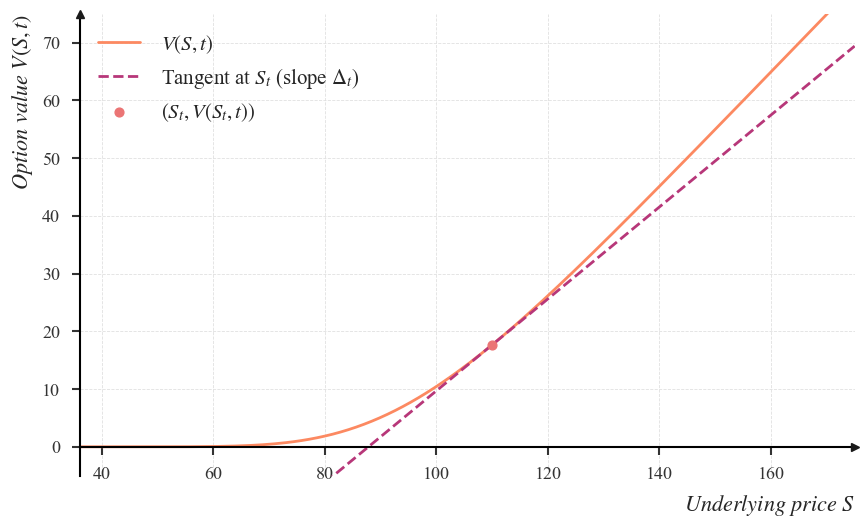

In [528]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# --- 1. CONFIGURATION DU STYLE ---
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman"],
    "mathtext.fontset": "stix",
    "font.size": 12,
    "axes.linewidth": 1.5,
    "xtick.direction": "out",
    "ytick.direction": "out",
    "figure.facecolor": "white",
    "savefig.facecolor": "white"
})

# --- 2. MODÈLE BLACK-SCHOLES ---
def bs_call_price(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

def bs_delta(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return norm.cdf(d1)

K = 100
r = 0.05
sigma = 0.2
T = 1.0
S_target = 110 

# --- 3. DONNÉES ---
# On commence le calcul à 36 pour remplir tout le graphique
S_grid = np.linspace(36, 175, 200) 
V_grid = bs_call_price(S_grid, K, T, r, sigma)

V_target = bs_call_price(S_target, K, T, r, sigma)
Delta_target = bs_delta(S_target, K, T, r, sigma)

S_tangent = np.linspace(80, 175, 50)
V_tangent = V_target + Delta_target * (S_tangent - S_target)

# --- 4. CRÉATION DE LA FIGURE ---
fig, ax = plt.subplots(figsize=(10, 6))

col_curve = '#fc8961'   
col_tangent = '#b73779' 
col_dot = '#eb7575'    

col_orange = '#fc8961' 
col_teal = '#b73779'  

# Tracé courbe et tangente
line1, = ax.plot(S_grid, V_grid, color=col_curve, linewidth=2, label=r'$V(S,t)$')
line2, = ax.plot(S_tangent, V_tangent, color=col_tangent, linestyle='--', linewidth=2, 
                 label=r'Tangent at $S_t$ (slope $\Delta_t$)')

# Point rouge
dot = ax.scatter([S_target], [V_target], color=col_dot, s=40, zorder=5, 
                 label=r'$(S_t, V(S_t, t))$')

# --- 5. CONFIGURATION DES AXES ---
ax.grid(True, which='major', linestyle='--', linewidth=0.6, color='#e0e0e0', zorder=0)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# --- MODIFICATION ICI : L'axe commence physiquement à 36 ---
ax.spines['left'].set_position(('data', 36))
ax.spines['bottom'].set_position(('data', 0))

ax.set_xlim(36, 175) # Limite visuelle à 36
ax.set_ylim(-5, 75)

# --- MODIFICATION ICI : Les ticks commencent à 40 ---
# arange(début, fin, pas) -> de 40 à 175 par pas de 20
ax.set_xticks(np.arange(40, 176, 20)) 
ax.tick_params(axis='x', labelsize=13, pad=8, width=1.5, length=6, direction='out', bottom=True)

ax.set_yticks(np.arange(0, 71, 10))
ax.tick_params(axis='y', labelsize=13, pad=8, width=1.5, length=6, direction='out', left=True)

# --- 6. TITRES ET LÉGENDE ---

# Titre vertical (Ajusté à gauche car l'axe a bougé à 36)
ax.text(28, 75, r"$Option\ value\ V(S,t)$", fontsize=16, 
        rotation=90, ha='right', va='top')

# Titre X
ax.text(175, -8, r"$Underlying\ price\ S$", fontsize=16, ha='right', va='top')

# Flèches
# Flèche Y ajustée à x=36
ax.plot(36, 75, "^k", clip_on=False, markersize=6, zorder=10)
ax.plot(175, 0, ">k", clip_on=False, markersize=6, zorder=10)

# Légende
ax.legend(handles=[line1, line2, dot], loc='upper left', frameon=False, fontsize=15, handletextpad=1)

plt.savefig("/Users/robinguichon/Desktop/EI1:EI2/ProjetEI1/Option_Value_Tangent.png", dpi=300, bbox_inches='tight')

plt.show()

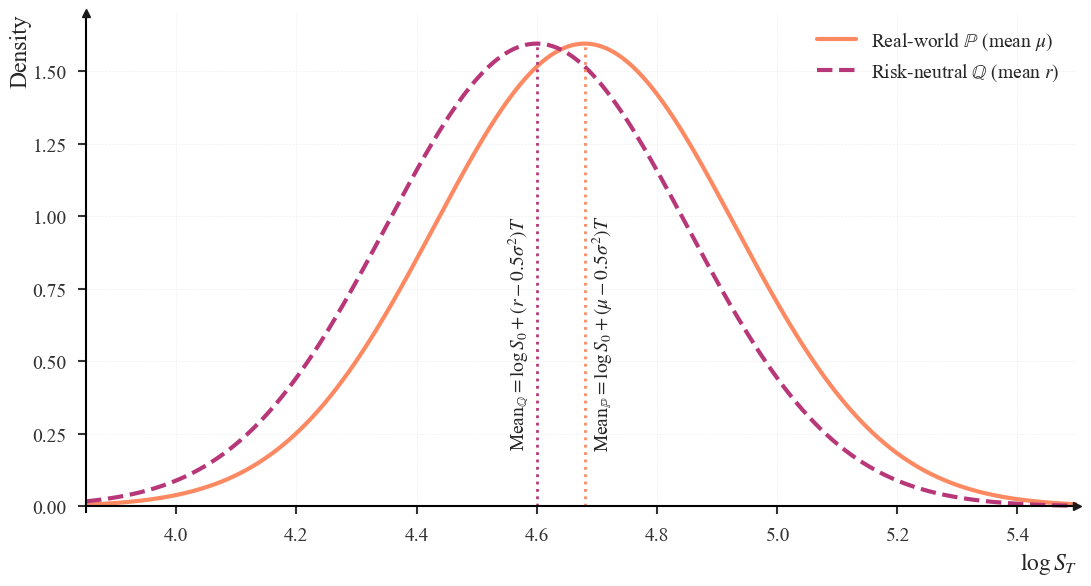

In [527]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# --- 1. CONFIGURATION DU STYLE ---
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman"],
    "mathtext.fontset": "stix",
    "font.size": 12,
    "axes.linewidth": 1.5,
    "xtick.direction": "out",
    "ytick.direction": "out",
    "figure.facecolor": "white",
    "savefig.facecolor": "white"
})

# --- 2. PARAMÈTRES ET DONNÉES ---
# On ajuste les paramètres pour correspondre visuellement aux pics de l'image
# Pic Vert (Risk Neutral) ~ 4.60
# Pic Rouge (Real World) ~ 4.68
# Ecart-type visuel ~ 0.25

mu_Q = 4.60  # Moyenne Risque-Neutre
mu_P = 4.68  # Moyenne Monde Réel
sigma = 0.25

x = np.linspace(3.85, 5.5, 500)

# Calcul des densités (PDF)
y_P = norm.pdf(x, loc=mu_P, scale=sigma)
y_Q = norm.pdf(x, loc=mu_Q, scale=sigma)

# --- 3. CRÉATION DE LA FIGURE ---
custom_figsize = (11, 6) # <--- CONTRÔLE DE LA TAILLE ICI
fig, ax = plt.subplots(figsize=custom_figsize)

# Couleurs
col_real = '#fc8961'    # Rouge saumon
col_risk = '#b73779'    # Vert sauge

col_orange = '#fc8961' 
col_teal = '#b73779'  
# --- 4. TRACÉ DES COURBES ---
# Courbe Rouge (Real-world)
ax.plot(x, y_P, color=col_real, linewidth=3, label=r'Real-world $\mathbb{P}$ (mean $\mu$)')

# Courbe Verte (Risk-neutral) - Tirets
ax.plot(x, y_Q, color=col_risk, linewidth=3, linestyle='--', label=r'Risk-neutral $\mathbb{Q}$ (mean $r$)')

# --- 5. LIGNES VERTICALES ET ANNOTATIONS ---
ymax_Q = norm.pdf(mu_Q, loc=mu_Q, scale=sigma)
ymax_P = norm.pdf(mu_P, loc=mu_P, scale=sigma)

# Lignes pointillées
ax.vlines(mu_Q, 0, ymax_Q, colors=col_risk, linestyles=':', linewidth=2)
ax.vlines(mu_P, 0, ymax_P, colors=col_real, linestyles=':', linewidth=2)

# Annotations (Texte vertical le long des lignes)
# Mean Q
text_Q = r"Mean$_{\mathbb{Q}} = \log S_0 + (r - 0.5\sigma^2)T$"
ax.text(mu_Q - 0.03, 0.6, text_Q, rotation=90, fontsize=14, va='center', ha='center')

# Mean P
text_P = r"Mean$_{\mathbb{P}} = \log S_0 + ( \mu - 0.5\sigma^2)T$"
ax.text(mu_P + 0.03, 0.6, text_P, rotation=90, fontsize=14, va='center', ha='center')

# --- 6. CONFIGURATION DES AXES ---
# Grille légère
ax.grid(True, which='major', linestyle='--', linewidth=0.5, color='#f0f0f0', zorder=0)

# Spines (Cadres)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Positionnement des axes (L'axe Y commence au début des données x=3.85)
x_start = 3.85
ax.spines['left'].set_position(('data', x_start))
ax.spines['bottom'].set_position(('data', 0))

# Limites
ax.set_xlim(x_start, 5.5)
ax.set_ylim(-0.02, 1.7)

# Ticks
ax.set_xticks(np.arange(4.0, 5.5, 0.2))
ax.tick_params(axis='x', labelsize=14, pad=8, width=1.5, length=6, direction='out', bottom=True)

ax.set_yticks(np.arange(0, 1.70, 0.25))
ax.tick_params(axis='y', labelsize=14, pad=8, width=1.5, length=6, direction='out', left=True)

# --- 7. TITRES (MAJUSCULE + VERTICAL) ---

# Titre Y : "Density" à la verticale, tout en haut
ax.text(x_start - 0.09, 1.7, "Density", fontsize=17, 
        rotation=90, ha='right', va='top')

# Titre X : "Log S_T" en bas à droite
ax.text(5.5, -0.15, r"$\log S_T$", fontsize=17, ha='right', va='top')

# --- 8. FLÈCHES ---
# Flèche Y (sur l'axe déplacé)
ax.plot(x_start, 1.7, "^k", clip_on=False, markersize=6, zorder=10)
# Flèche X
ax.plot(5.5, 0, ">k", clip_on=False, markersize=6, zorder=10)

# --- 9. LÉGENDE ---
ax.legend(loc='upper right', frameon=False, fontsize=14)

plt.tight_layout()
plt.savefig("/Users/robinguichon/Desktop/EI1:EI2/ProjetEI1/Risk_Neutral_vs_Real_World.png", dpi=300, bbox_inches='tight')
plt.show()

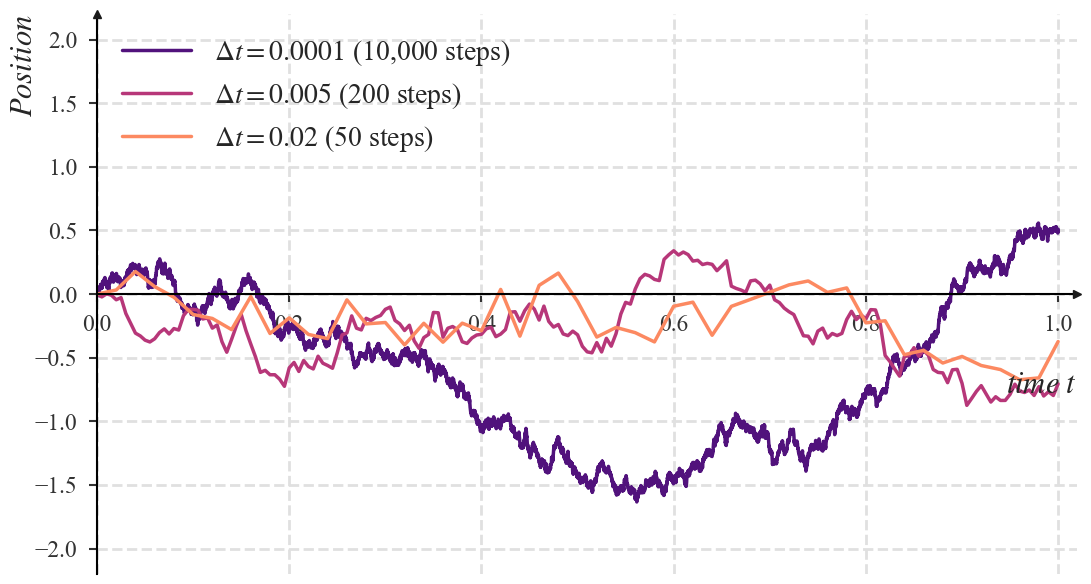

In [526]:
import matplotlib.pyplot as plt
import numpy as np

# --- 1. CONFIGURATION DU STYLE ---
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman"],
    "mathtext.fontset": "stix",
    "font.size": 12,
    "axes.linewidth": 1.5,
    "xtick.direction": "out",
    "ytick.direction": "out",
    "figure.facecolor": "white",
    "savefig.facecolor": "white"
})

# --- 2. SIMULATION DU MOUVEMENT BROWNIEN ---
def brownian_motion(n_steps, T=1.0, seed=42):
    # On active le seed pour que la forme soit toujours la même
    np.random.seed(seed) 
    dt = T / n_steps
    # dW ~ N(0, dt)
    dW = np.random.normal(0, np.sqrt(dt), n_steps)
    # W = cumsum(dW)
    W = np.cumsum(dW)
    # On ajoute 0 au début
    W = np.insert(W, 0, 0.0)
    t = np.linspace(0, T, n_steps + 1)
    return t, W

# Génération des données
t3, W3 = brownian_motion(10000, seed=10) # Teal (Haut détail)
t2, W2 = brownian_motion(200, seed=15)   # Jaune
t1, W1 = brownian_motion(50, seed=25)    # Orange (Gros pas)

# --- 3. CRÉATION DE LA FIGURE ---
custom_figsize = (11, 6)
fig, ax = plt.subplots(figsize=custom_figsize)

# Couleurs
col_orange = '#fc8961' 
col_lime = '#b73779'    
col_teal = '#51127c'     

# --- 4. TRACÉ DES COURBES (ÉPAISSEURS AUGMENTÉES) ---
# 1. Haute fréquence (Teal) - Epaisseur 2.0
ax.plot(t3, W3, color=col_teal, linewidth=2.50, label=r'$\Delta t = 0.0001$ (10,000 steps)')

# 2. Moyenne fréquence (Lime) - Epaisseur 3.0
ax.plot(t2, W2, color=col_lime, linewidth=2.50, label=r'$\Delta t = 0.005$ (200 steps)')

# 3. Basse fréquence (Orange) - Epaisseur 3.8
ax.plot(t1, W1, color=col_orange, linewidth=2.50, label=r'$\Delta t = 0.02$ (50 steps)')


# --- 5. CONFIGURATION DES AXES ---
# Grille
ax.grid(True, which='major', linestyle='--', linewidth=2, color='#e0e0e0', zorder=0)

# Spines (Cadres)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Centrage des axes
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))

# Limites
ax.set_xlim(0, 1.02)
ax.set_ylim(-2.2, 2.2) 

# --- 6. TICKS ET GRADUATIONS (TAILLE 17) ---
# Axe X
ax.set_xticks(np.arange(0.0, 1.1, 0.2))
ax.tick_params(axis='x', labelsize=17, pad=8, width=1.5, length=6, direction='out', bottom=True)

# Axe Y
ax.set_yticks(np.arange(-2.0, 2.1, 0.5))
ax.tick_params(axis='y', labelsize=17, pad=8, width=1.5, length=6, direction='out', left=True)

# --- 7. TITRES ---
# Titre Y : "position"
ax.text(-0.06, 2.2, r"$Position$", fontsize=22, fontstyle='italic',
        rotation=90, ha='right', va='top')

# Titre X : "time t"
ax.text(1.02, -0.6, r"$time\ t$", fontsize=22, fontstyle='italic',
        ha='right', va='top')

# --- 8. FLÈCHES ---
ax.plot(0, 2.2, "^k", clip_on=False, markersize=6, zorder=10)
ax.plot(1.02, 0, ">k", clip_on=False, markersize=6, zorder=10)

# --- 9. LÉGENDE (TAILLE 16) ---
ax.legend(loc='upper left', frameon=False, fontsize=20, handlelength=2.5)

plt.tight_layout()
plt.savefig("/Users/robinguichon/Desktop/EI1:EI2/ProjetEI1/Brownian_Convergence.png", dpi=300, bbox_inches='tight')
plt.show()

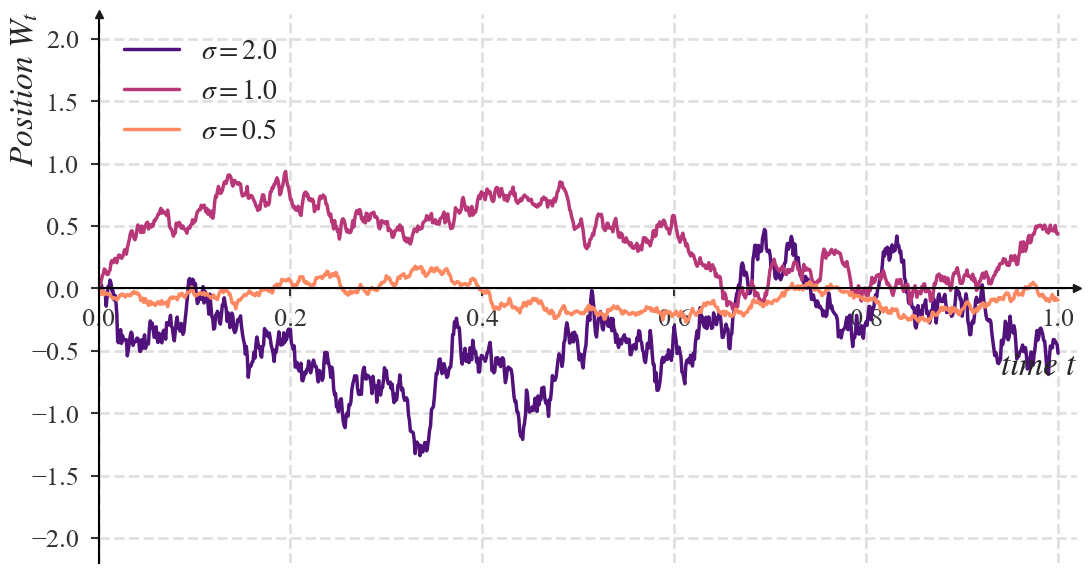

In [525]:
import matplotlib.pyplot as plt
import numpy as np

# --- 1. CONFIGURATION DU STYLE ---
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman"],
    "mathtext.fontset": "stix",
    "font.size": 12,
    "axes.linewidth": 1.5,
    "xtick.direction": "out",
    "ytick.direction": "out",
    "figure.facecolor": "white",
    "savefig.facecolor": "white"
})

# --- 2. SIMULATION DU MOUVEMENT BROWNIEN (AVEC VOLATILITÉ) ---
def brownian_motion_sigma(sigma, n_steps=1000, T=1.0, seed=42):
    #np.random.seed(seed)
    dt = T / n_steps
    # dW ~ N(0, sigma^2 * dt)
    dW = np.random.normal(0, sigma * np.sqrt(dt), n_steps)
    W = np.cumsum(dW)
    W = np.insert(W, 0, 0.0)
    t = np.linspace(0, T, n_steps + 1)
    return t, W

# Génération des données
t_teal, W_teal = brownian_motion_sigma(sigma=2.0, seed=101)  # Teal (Forte amplitude)
t_lime, W_lime = brownian_motion_sigma(sigma=1.0, seed=42)   # Lime (Moyenne)
t_orange, W_orange = brownian_motion_sigma(sigma=0.5, seed=12) # Orange (Faible amplitude)

# --- 3. CRÉATION DE LA FIGURE ---
custom_figsize = (11, 6)
fig, ax = plt.subplots(figsize=custom_figsize)

# Couleurs
col_orange = '#fc8961' 
col_lime = '#b73779'    
col_teal = '#51127c'   

col_orange = '#fc8961' 
col_teals = '#b73779'    
'51127c'

# --- 4. TRACÉ DES COURBES ---
# Courbe Teal (sigma = 2.0)
ax.plot(t_teal, W_teal, color=col_teal, linewidth=2.50, label=r'$\sigma = 2.0$')

# Courbe Lime (sigma = 1.0)
ax.plot(t_lime, W_lime, color=col_lime, linewidth=2.50, label=r'$\sigma = 1.0$')

# Courbe Orange (sigma = 0.5)
ax.plot(t_orange, W_orange, color=col_orange, linewidth=2.50, label=r'$\sigma = 0.5$')

# --- 5. CONFIGURATION DES AXES ---
# Grille
ax.grid(True, which='major', linestyle='--', linewidth=2, color='#e0e0e0', zorder=0)

# Spines (Cadres)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Centrage des axes
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))

# Limites
ax.set_xlim(0, 1.02)
ax.set_ylim(-2.2, 2.2) 

# --- 6. TICKS ET GRADUATIONS (TAILLE 17) ---
# Axe X
ax.set_xticks(np.arange(0.0, 1.1, 0.2))
ax.tick_params(axis='x', labelsize=19, pad=8, width=1.5, length=6, direction='out', bottom=True)

# Axe Y
ax.set_yticks(np.arange(-2.0, 2.1, 0.5))
ax.tick_params(axis='y', labelsize=19, pad=8, width=1.5, length=6, direction='out', left=True)

# --- 7. TITRES (TAILLE 22) ---

# --- MODIFICATION ICI : ROTATION 90 POUR LA VERTICALE ---
# J'ai ajusté la position X (-0.06) et l'alignement (va='center') pour que ce soit joli
ax.text(-0.06, 1.6, r"$Position\ W_t$", fontsize=24, fontstyle='italic',
        rotation=90, ha='right', va='center') 

# Titre X
ax.text(1.02, -0.5, r"$time\ t$", fontsize=24, fontstyle='italic',
        ha='right', va='top')

# --- 8. FLÈCHES ---
ax.plot(0, 2.2, "^k", clip_on=False, markersize=6, zorder=10)
ax.plot(1.02, 0, ">k", clip_on=False, markersize=6, zorder=10)

# --- 9. LÉGENDE (TAILLE 20) ---
ax.legend(loc='upper left', frameon=False, fontsize=20, handlelength=2.0)

plt.tight_layout()
plt.savefig("/Users/robinguichon/Desktop/EI1:EI2/ProjetEI1/Brownian_Volatility_Sigma_Vertical.png", dpi=300, bbox_inches='tight')
plt.show()

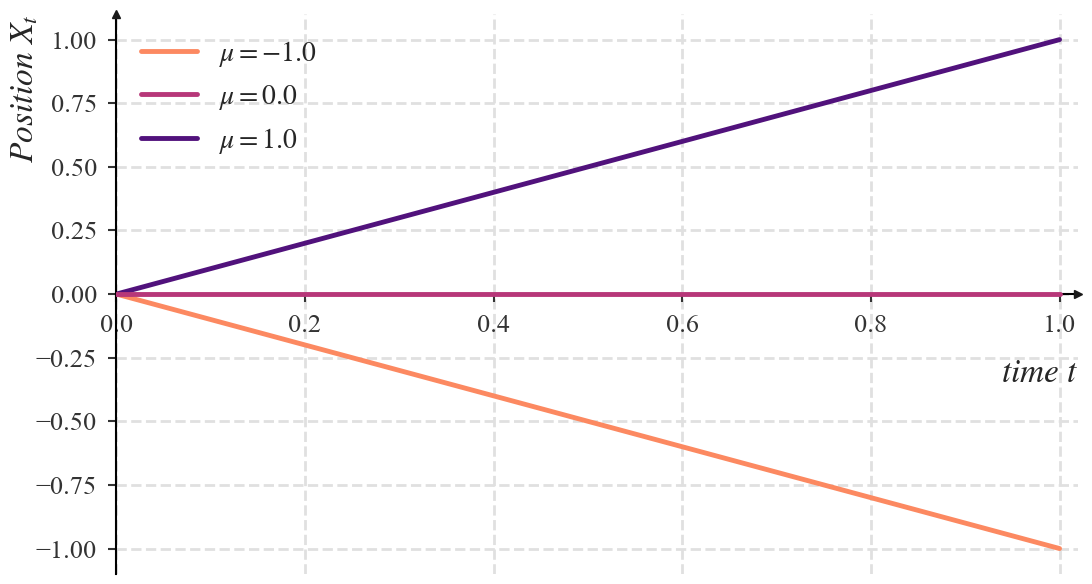

In [524]:
import matplotlib.pyplot as plt
import numpy as np

# --- 1. CONFIGURATION DU STYLE ---
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman"],
    "mathtext.fontset": "stix",
    "font.size": 12,
    "axes.linewidth": 1.5,
    "xtick.direction": "out",
    "ytick.direction": "out",
    "figure.facecolor": "white",
    "savefig.facecolor": "white"
})

# --- 2. GÉNÉRATION DES DONNÉES (DRIFT LINEAIRE) ---
# X_t = mu * t
t = np.linspace(0, 1, 100)

# Calcul des trajectoires
X_teal = 1.0 * t   # Pente positive
X_lime = 0.0 * t   # Pente nulle
X_orange = -1.0 * t # Pente négative

# --- 3. CRÉATION DE LA FIGURE ---
custom_figsize = (11, 6)
fig, ax = plt.subplots(figsize=custom_figsize)

# Couleurs (Mêmes que précédemment)
col_orange = '#fc8961' 
col_lime = '#b73779'    
col_teal = '#51127c'    

# Tes couleurs exactes
col_orange = '#fc8961' 
col_teals = '#b73779'    
'51127c'
# --- 4. TRACÉ DES COURBES ---
# On trace avec l'épaisseur demandée (2.50)

# Courbe Orange (mu = -1.0)
ax.plot(t, X_orange, color=col_orange, linewidth=3.50, label=r'$\mu = -1.0$')

# Courbe Lime (mu = 0.0)
# zorder=3 pour s'assurer qu'elle passe au-dessus de l'axe noir
ax.plot(t, X_lime, color=col_lime, linewidth=3.50, label=r'$\mu = 0.0$', zorder=3)

# Courbe Teal (mu = 1.0)
ax.plot(t, X_teal, color=col_teal, linewidth=3.50, label=r'$\mu = 1.0$')


# --- 5. CONFIGURATION DES AXES ---
# Grille
ax.grid(True, which='major', linestyle='--', linewidth=2, color='#e0e0e0', zorder=0)

# Spines (Cadres)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Centrage des axes
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))

# Limites (Ajustées pour -1 à 1)
ax.set_xlim(0, 1.02)
ax.set_ylim(-1.1, 1.1) 

# --- 6. TICKS ET GRADUATIONS (TAILLE 19) ---
# Axe X : 0.0 à 1.0
ax.set_xticks(np.arange(0.0, 1.1, 0.2))
ax.tick_params(axis='x', labelsize=19, pad=8, width=1.5, length=6, direction='out', bottom=True)

# Axe Y : -1.00 à 1.00 par pas de 0.25
ax.set_yticks(np.arange(-1.0, 1.01, 0.25))
ax.tick_params(axis='y', labelsize=19, pad=8, width=1.5, length=6, direction='out', left=True)

# --- 7. TITRES (TAILLE 24) ---

# Titre Y : "position Xt" (Vertical)
ax.text(-0.08, 1.1, r"$Position\ X_t$", fontsize=24, fontstyle='italic',
        rotation=90, ha='right', va='top') 

# Titre X : "time t"
ax.text(1.02, -0.25, r"$time\ t$", fontsize=24, fontstyle='italic',
        ha='right', va='top')

# --- 8. FLÈCHES ---
ax.plot(0, 1.1, "^k", clip_on=False, markersize=6, zorder=10)
ax.plot(1.02, 0, ">k", clip_on=False, markersize=6, zorder=10)

# --- 9. LÉGENDE (TAILLE 20) ---
ax.legend(loc='upper left', frameon=False, fontsize=20, handlelength=2.0)

plt.tight_layout()
plt.savefig("/Users/robinguichon/Desktop/EI1:EI2/ProjetEI1/Drift_Mu_Vertical.png", dpi=300, bbox_inches='tight')
plt.show()

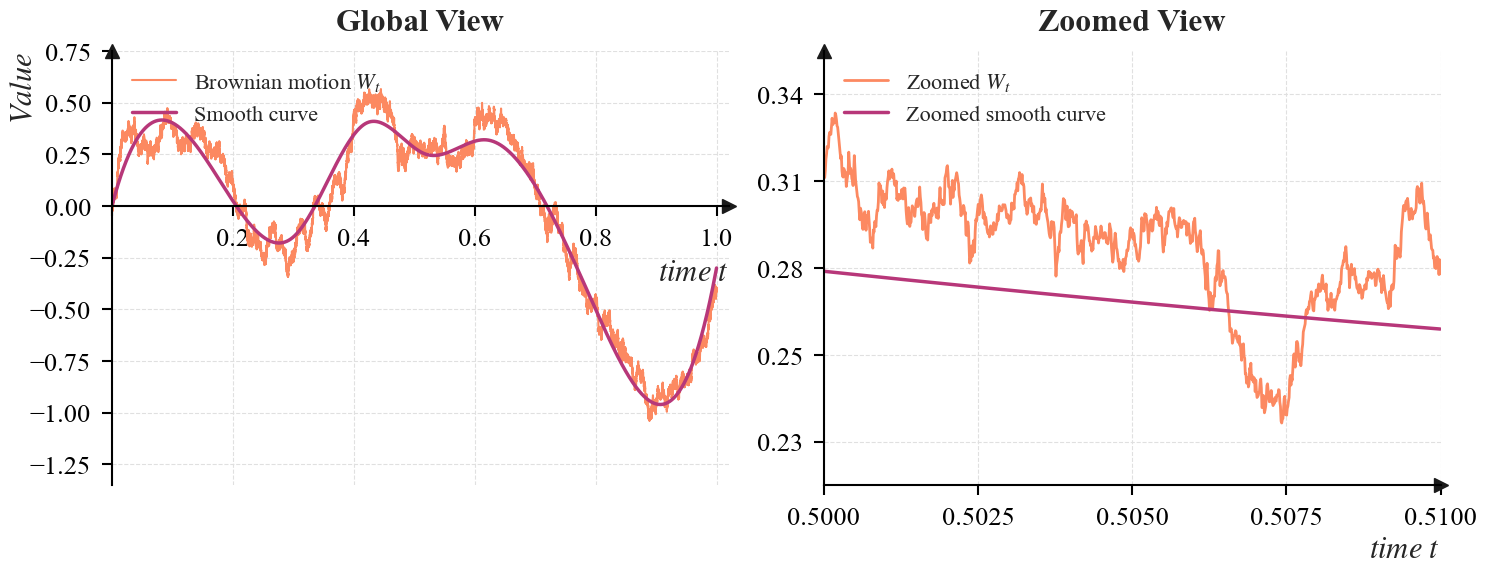

In [522]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline

# --- 1. CONFIGURATION DU STYLE (TES PARAMÈTRES EXACTS) ---
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman"],
    "mathtext.fontset": "stix",      # On garde STIX comme demandé
    "font.size": 14,
    "axes.linewidth": 1.5,
    "xtick.direction": "out",
    "ytick.direction": "out",
    "figure.facecolor": "white",
    "savefig.facecolor": "white"
})

# --- 2. RECONSTRUCTION DES DONNÉES ---
np.random.seed(42)
N = 100000 
T = 1.0
t = np.linspace(0, T, N)

# --- A. Création de la "Smooth Curve" ---
# J'ai gardé tes points mais ajusté très légèrement pour que ça colle visuellement à l'image
t_control = [0.0, 0.15, 0.30, 0.42, 0.52, 0.62, 0.80, 0.92, 1.0]
y_control = [0.0, 0.25, -0.15, 0.40, 0.25, 0.32, -0.50, -0.95, -0.30]

cs = CubicSpline(t_control, y_control)
smooth_curve = cs(t)

# --- B. Création du "Brownian Motion" ---
noise = np.zeros(N)
dt = T / (N - 1)
sigma = 0.8  # Tes paramètres conservés
theta = 50.0 # Tes paramètres conservés

dW = np.random.normal(0, np.sqrt(dt), N)
curr_noise = 0
for i in range(1, N):
    curr_noise += -theta * curr_noise * dt + sigma * dW[i]
    noise[i] = curr_noise

W_t = smooth_curve + noise

# --- 3. CONFIGURATION DU ZOOM ---
t_min_zoom, t_max_zoom = 0.5000, 0.5100
mask_zoom = (t >= t_min_zoom) & (t <= t_max_zoom)

t_zoom = t[mask_zoom]
W_zoom = W_t[mask_zoom]
smooth_zoom = smooth_curve[mask_zoom]

# --- CALCUL AUTOMATIQUE DES LIMITES DU ZOOM (LA SEULE MODIFICATION FONCTIONNELLE) ---
# Ceci assure que le graphe ne soit jamais vide, même si la courbe bouge
y_min_data = min(W_zoom.min(), smooth_zoom.min())
y_max_data = max(W_zoom.max(), smooth_zoom.max())
margin = (y_max_data - y_min_data) * 0.2 # Marge de 20%

y_min_zoom = y_min_data - margin
y_max_zoom = y_max_data + margin

# --- 4. CRÉATION DE LA FIGURE ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
plt.subplots_adjust(wspace=0.15) 

# Tes couleurs exactes
col_orange = '#fc8961' 
col_teal = '#b73779'    

# --- 5. GRAPHIQUE 1 : GLOBAL VIEW ---
ax1.plot(t, W_t, color=col_orange, linewidth=1.5, label=r'Brownian motion $W_t$')
ax1.plot(t, smooth_curve, color=col_teal, linewidth=2.5, label=r'Smooth curve')

ax1.set_title("Global View", fontsize=23, fontweight='bold', pad=15)

# Axes Global (Ta configuration exacte)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_position(('data', 0))
ax1.spines['bottom'].set_position(('data', 0))
ax1.spines['left'].set_zorder(10)
ax1.spines['bottom'].set_zorder(10)

ax1.set_xlim(0, 1.02)
ax1.set_ylim(-1.35, 0.75)

ax1.set_xticks(np.arange(0.0, 1.1, 0.2))
ax1.set_yticks(np.arange(-1.25, 0.76, 0.25))
# Masquer le 0.0 de l'axe X pour éviter le chevauchement
ax1.set_xticklabels([f"{x:.1f}" if x != 0 else "" for x in ax1.get_xticks()])

# --- 6. GRAPHIQUE 2 : ZOOMED VIEW ---
ax2.plot(t_zoom, W_zoom, color=col_orange, linewidth=2.0, label=r'Zoomed $W_t$')
ax2.plot(t_zoom, smooth_zoom, color=col_teal, linewidth=2.5, label=r'Zoomed smooth curve')

ax2.set_title("Zoomed View", fontsize=23, fontweight='bold', pad=15)

# Axes Zoom (Ta configuration exacte, ajustée aux limites dynamiques)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_position(('data', t_min_zoom))
ax2.spines['bottom'].set_position(('data', y_min_zoom))
ax2.spines['left'].set_zorder(10)
ax2.spines['bottom'].set_zorder(10)

# Limites Zoom (Calculées dynamiquement pour que ça marche)
ax2.set_xlim(t_min_zoom, t_max_zoom)
ax2.set_ylim(y_min_zoom, y_max_zoom) 

# Ticks Zoom
ax2.set_xticks(np.linspace(t_min_zoom, t_max_zoom, 5))
ax2.set_yticks(np.linspace(y_min_zoom + (y_max_zoom-y_min_zoom)*0.1, y_max_zoom - (y_max_zoom-y_min_zoom)*0.1, 5))

# Formatage
ax2.xaxis.set_major_formatter(plt.FormatStrFormatter('%.4f'))
ax2.yaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))

# --- 7. STYLE COMMUN (TON CODE EXACT) ---
for ax in [ax1, ax2]:
    ax.grid(True, which='major', linestyle='--', linewidth=0.8, color='#e0e0e0', zorder=0)
    
    ax.tick_params(axis='both', which='major', direction='out',
                   length=7, 
                   width=1.5, 
                   colors='black',
                   left=True, bottom=True, pad=8, labelsize=19, zorder=10)
    
    ax.legend(loc='upper left', frameon=False, fontsize=16)

# --- 8. TITRES ET FLÈCHES ---

# -- AXE 1 --
ax1.text(-0.12, 0.75, r"$Value$", fontsize=22, fontstyle='italic',
        rotation=90, ha='right', va='top')
ax1.text(1.02, -0.25, r"$time\ t$", fontsize=22, fontstyle='italic', ha='right', va='top')

ax1.plot(0, 0.75, "^k", clip_on=False, markersize=10, zorder=10)
ax1.plot(1.02, 0, ">k", clip_on=False, markersize=10, zorder=10)

# -- AXE 2 --
# Ajustement dynamique de la position du label time
ax2.text(t_max_zoom, y_min_zoom-0.005 - (y_max_zoom-y_min_zoom)*0.08, r"$time\ t$", fontsize=22, fontstyle='italic', ha='right', va='top')

# Flèches (Positionnées dynamiquement aux limites réelles)
ax2.plot(t_min_zoom, y_max_zoom, "^k", clip_on=False, markersize=10, zorder=10)
ax2.plot(t_max_zoom, y_min_zoom, ">k", clip_on=False, markersize=10, zorder=10)

plt.tight_layout()
plt.savefig("/Users/robinguichon/Desktop/EI1:EI2/ProjetEI1/Drift_ccccdcMu_Vertical.png", dpi=300, bbox_inches='tight')

plt.show()

Ta palette Magma :
['#000004', '#1d1147', '#51127c', '#832681', '#b73779', '#e75263', '#fc8961', '#fec488', '#fcfdbf']


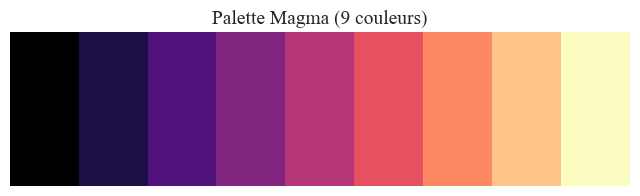

In [483]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# 1. Choisir le nombre de couleurs que tu veux dans ta palette
n_colors = 9

# 2. Récupérer la colormap Magma officielle
cmap = plt.get_cmap('magma')

# 3. Extraire les codes HEX
magma_colors = [mcolors.rgb2hex(cmap(i)) for i in np.linspace(0, 1, n_colors)]

# Afficher la liste pour copier-coller
print("Ta palette Magma :")
print(magma_colors)

# --- VISUALISATION ---
fig, ax = plt.subplots(figsize=(8, 2))
gradient = np.linspace(0, 1, n_colors).reshape(1, -1)
ax.imshow(gradient, aspect='auto', cmap='magma')
ax.set_axis_off()
plt.title(f"Palette Magma ({n_colors} couleurs)", fontsize=14, fontname="serif")
plt.show()